# 5. The Impact of Demographics on Prevalence Distributions

## Health is Not Distributed Equally

A population is not a monolith. Health outcomes and prevalence are heavily influenced by demographic factors. Two of the most important are:

- **Age**: The prevalence and severity of most chronic conditions increase with age.
- **Deprivation**: People living in more deprived areas tend to experience worse health outcomes at younger ages (the 'social gradient in health').

A robust model for diagnostic demand must account for these factors. We can do this by adjusting the parameters of our Probability Density Functions (PDFs) to reflect the characteristics of a specific sub-population.

In this notebook, we'll take our frailty model from Notebook 2 and see how its shape changes when we compare two very different hypothetical populations:
1. A **younger, less deprived** area.
2. An **older, more deprived** area, which is more characteristic of some parts of the NHS South West.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme(style="whitegrid")

### Adjusting PDF Parameters for Different Populations

We will use the Beta distribution again to model frailty scores (0-1). We will define two sets of parameters (`a` and `b`) to represent our two populations:

- **Younger, Less Deprived**: We expect a strong right-skew. Most people are very fit, so the peak of the distribution will be close to 0. We'll use `a=1.5`, `b=9`.
- **Older, More Deprived**: We expect the entire distribution to shift to the right. The average frailty is higher, and the tail of severely frail individuals is 'fatter'. We'll use `a=3`, `b=7`.

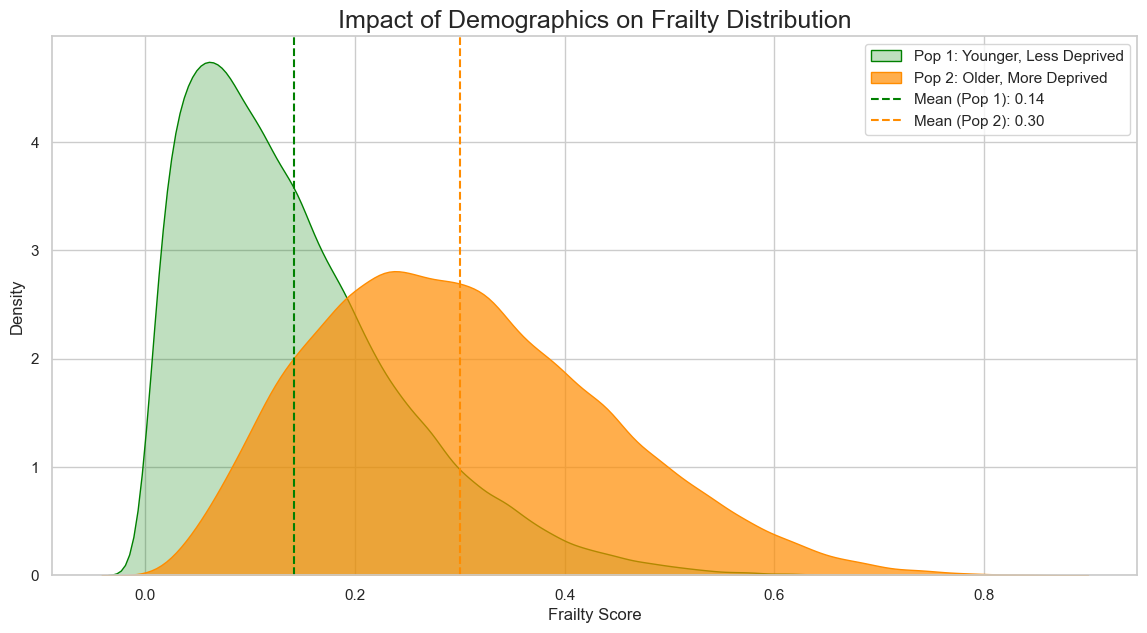

In [4]:
population_size = 50000

# Parameters for Population 1: Younger, Less Deprived
a1, b1 = 1.5, 9
frailty_pop1 = stats.beta.rvs(a1, b1, size=population_size, random_state=42)

# Parameters for Population 2: Older, More Deprived
a2, b2 = 3, 7
frailty_pop2 = stats.beta.rvs(a2, b2, size=population_size, random_state=42)

# Plotting the comparison
plt.figure(figsize=(14, 7))

sns.kdeplot(frailty_pop1, label='Pop 1: Younger, Less Deprived', color='green', fill=True)
sns.kdeplot(frailty_pop2, label='Pop 2: Older, More Deprived', color='darkorange', fill=True, alpha=0.7)

mean1 = np.mean(frailty_pop1)
mean2 = np.mean(frailty_pop2)

plt.axvline(mean1, color='green', linestyle='--', label=f'Mean (Pop 1): {mean1:.2f}')
plt.axvline(mean2, color='darkorange', linestyle='--', label=f'Mean (Pop 2): {mean2:.2f}')

plt.title('Impact of Demographics on Frailty Distribution', fontsize=18)
plt.xlabel('Frailty Score', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()

The plot clearly shows the entire distribution for the older, more deprived population is shifted to the right. The peak is at a higher frailty score, and the right tail is significantly thicker.

### Quantifying the Impact on Service Demand

Let's quantify what this shift means for diagnostic planning. We'll use the same frailty categories as before and calculate the number of people in the **'Severe'** category (score >= 0.36) for both populations. This is the group most likely to need home-based diagnostics.

In [5]:
# Define the threshold for severe frailty
severe_threshold = 0.36

# --- Population 1: Younger, Less Deprived ---
prop_severe_pop1 = 1 - stats.beta.cdf(severe_threshold, a1, b1)
count_severe_pop1 = int(prop_severe_pop1 * population_size)

# --- Population 2: Older, More Deprived ---
prop_severe_pop2 = 1 - stats.beta.cdf(severe_threshold, a2, b2)
count_severe_pop2 = int(prop_severe_pop2 * population_size)

print("Estimating Demand for Services Targeting Severe Frailty:")
print("-" * 55)
print(f"Population 1 (Younger, Less Deprived):")
print(f"  - Estimated 'Severe' Cases: {count_severe_pop1:,} ({prop_severe_pop1:.1%})\n")
print(f"Population 2 (Older, More Deprived):")
print(f"  - Estimated 'Severe' Cases: {count_severe_pop2:,} ({prop_severe_pop2:.1%})\n")
print("-" * 55)
print(f"The older, more deprived area has over {count_severe_pop2/count_severe_pop1:.1f} times more severely frail individuals.")

Estimating Demand for Services Targeting Severe Frailty:
-------------------------------------------------------
Population 1 (Younger, Less Deprived):
  - Estimated 'Severe' Cases: 2,062 (4.1%)

Population 2 (Older, More Deprived):
  - Estimated 'Severe' Cases: 15,720 (31.4%)

-------------------------------------------------------
The older, more deprived area has over 7.6 times more severely frail individuals.


## Conclusion

This simulation demonstrates a critical point: **demography is destiny in health planning**. A one-size-fits-all model of prevalence is inadequate. By adjusting the parameters of our PDFs based on local population characteristics, we can create far more accurate and localized forecasts of need.

So far, we have worked with synthetic data to build our understanding. The next logical step is to find real-world data to drive these models. 

In the next notebook, we will begin the process of acquiring real public health data by exploring the **PHE Fingertips API**.